In [1]:
import pandas as pd
import numpy as np

#visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
train = pd.read_csv('ev_train.csv')
train.head()

,Sales,Petrol price
0,25,73.80
1,73,75.49
2,31,75.14
3,95,76.79
4,59,77.77


AttributeError: 'Line2D' object has no property 'secondary_y'

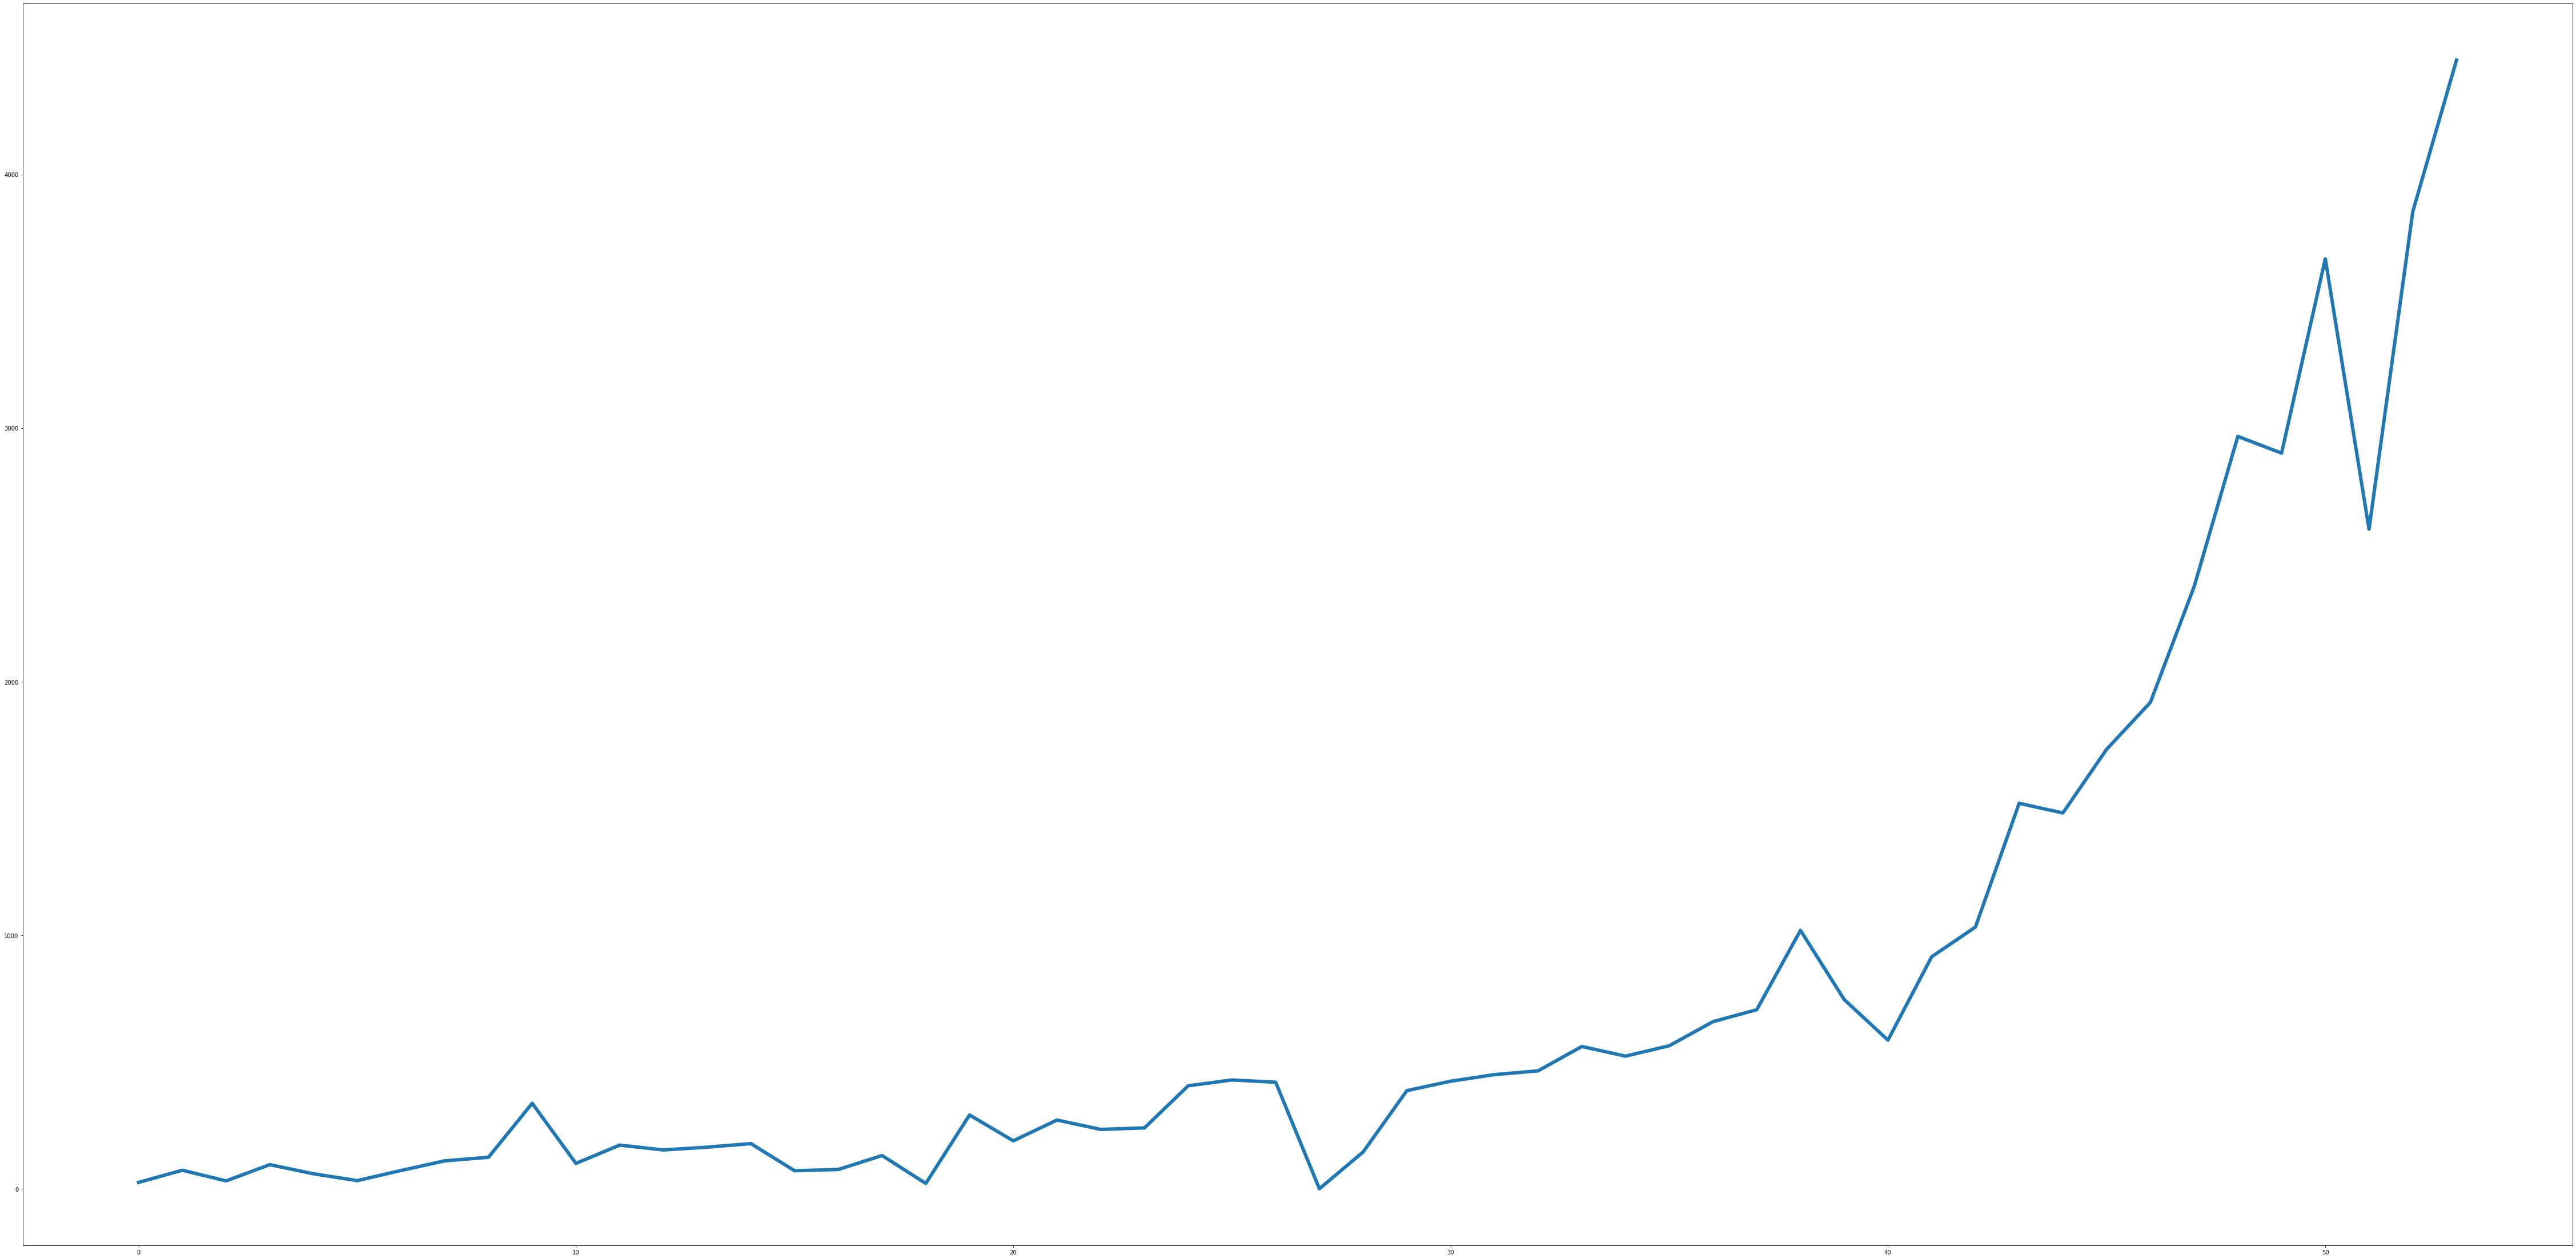

In [4]:
# Plotiing the data
plt.figure(figsize=(80,40))
plt.plot(train['Sales'],label="EV Sale",linewidth=6)
plt.plot(train['Petrol price'],secondary_y=True,label="EV Sale",linewidth=6)

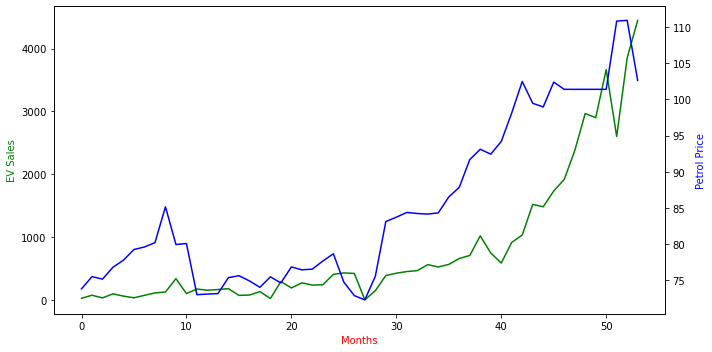

In [5]:
# plotting figures by creating axes object
# using subplots() function
x = np.arange(0, 54)
fig, ax = plt.subplots(figsize = (10, 5))
# plt.title('Example of Two Y labels')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(x, train['Sales'], color = 'g')
ax2.plot(x, train['Petrol price'], color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Months', color = 'r')
ax.set_ylabel('EV Sales', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('Petrol Price', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()


In [6]:
train['Month'] = pd.date_range(start='15/1/2018', periods=len(train), freq='M')
train.head()

,Sales,Petrol price,Month
0,25,73.80,2018-01-31
1,73,75.49,2018-02-28
2,31,75.14,2018-03-31
3,95,76.79,2018-04-30
4,59,77.77,2018-05-31


In [7]:
train.set_index("Month",inplace=True)
train.head()

,Sales,Petrol price
Month,,
2018-01-31,25,73.80
2018-02-28,73,75.49
2018-03-31,31,75.14
2018-04-30,95,76.79
2018-05-31,59,77.77


In [8]:
decompose = seasonal_decompose(train['Sales'])

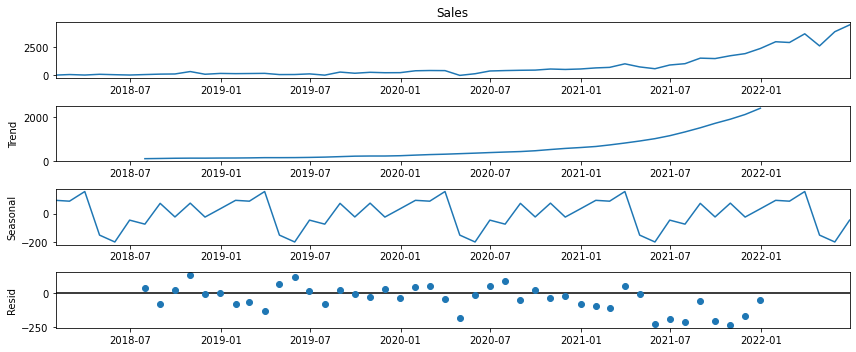

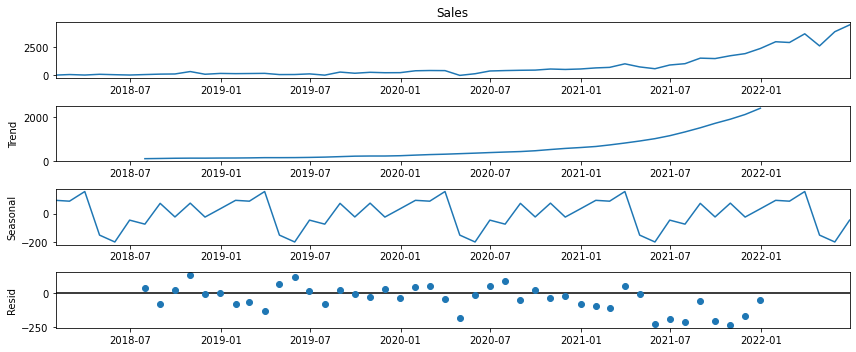

In [9]:
decompose.plot()

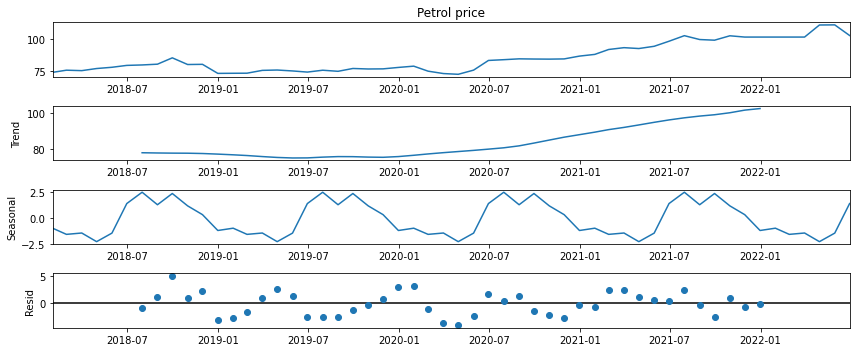

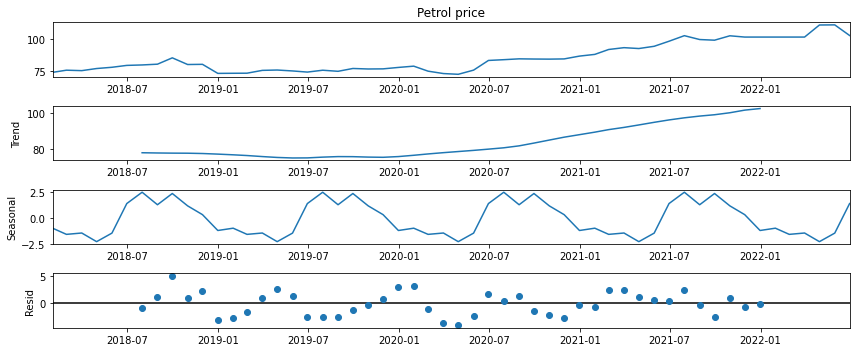

In [10]:
decompose1 = seasonal_decompose(train['Petrol price'])
decompose1.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def dickey_fuller(series,title='Dickey Fuller test of your dataset reveals the following about stationarity'):
    '''This function takes a series and returns whether the time series is stationary or not.
    The result is based on the p-value returned by the dickey fuller test    
    '''
    
    print(f'Test of Stationarity using Dickey Fuller Test of the dataset {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','# observations']
    
    out = pd.Series(data=result[0:4],index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")  

In [13]:
dickey_fuller(train['Sales'])

Test of Stationarity using Dickey Fuller Test of the dataset Dickey Fuller test of your dataset reveals the following about stationarity
ADF test statistics      4.862523
p-value                  1.000000
#lags                   11.000000
# observations          42.000000
critical value (1%)     -3.596636
critical value (5%)     -2.933297
critical value (10%)    -2.604991
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


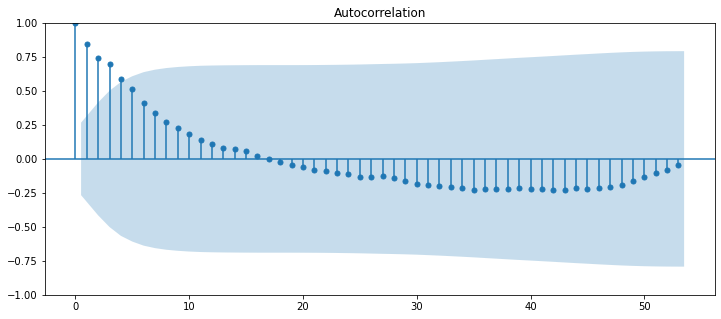

In [14]:
# Plotting ACF
acf=plot_acf(train['Sales'].dropna(),lags=53)

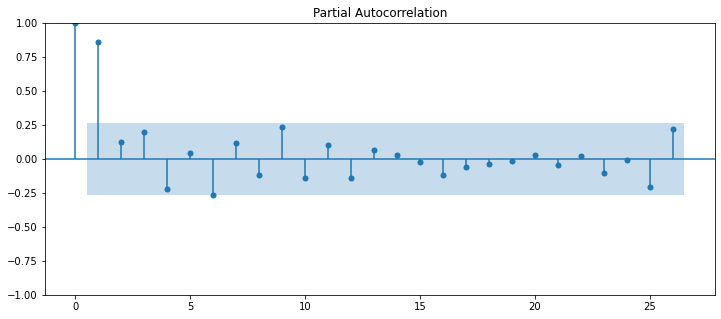

In [15]:
# Plotting PACF
pacf=plot_pacf(train['Sales'].dropna(),lags=26)

In [16]:
warnings.filterwarnings(action='ignore',message='')
auto_arima(train['Sales'],exogenous = train['Petrol price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(1, 2, 2)x(1, 1, [], 12)   Log Likelihood                -277.604
Date:                             Fri, 11 Nov 2022   AIC                            565.208
Time:                                     19:13:14   BIC                            573.652
Sample:                                 01-31-2018   HQIC                           568.261
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1706      0.291      0.586      0.558      -0.400       0.741
ma.L1         -1.8163      0.563     -3.229      0.001      -2.919      -0.714
ma.L2          0.9588      0.578      1.659      0.097      -0.174       2.092
ar.S.L12      -0.4338      0.361     -1.202      0.229      -1.141       0.274
sigma2      5.164e+04   1.84e+04      2.799      0.005    1.55e+04    8.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                77.19
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
warnings.filterwarnings(action='ignore',message='')
auto_arima(train['Sales'],seasonal=True,).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -363.544
Date:                Fri, 11 Nov 2022   AIC                            735.089
Time:                        19:13:16   BIC                            742.894
Sample:                    01-31-2018   HQIC                           738.081
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5299      6.024      1.084      0.278      -5.277      18.336
ma.L1         -1.5597      0.105    -14.866      0.000      -1.765      -1.354
ma.L2          0.6723      0.113      5.973      0.000       0.452       0.893
sigma2      6.556e+04   9252.489      7.085      0.000    4.74e+04    8.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               112.82
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              14.65   Skew:                            -1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
from pmdarima.arima import ndiffs
print(ndiffs(train['Sales']))

2


In [19]:
test = pd.read_csv('ev_test.csv')
test['Month'] = pd.date_range(start='2022-07-31', periods=len(test), freq='M')
test.set_index("Month",inplace=True)
test

,Sales,Petrol price
Month,,
2022-07-31,4458,102.63
2022-08-31,4346,102.63
2022-09-30,4240,102.63
2022-10-31,4935,102.63


In [20]:
#Importing Mean Squared Error (MSE) to measure the accuracy of predeictions
from sklearn.metrics import mean_squared_error, accuracy_score

In [21]:
combined = pd.concat([train,test[:2]])
# train.reset_index()
print(train)
combined

            Sales  Petrol price
Month                          
2018-01-31     25         73.80
2018-02-28     73         75.49
2018-03-31     31         75.14
2018-04-30     95         76.79
2018-05-31     59         77.77
2018-06-30     32         79.24
2018-07-31     72         79.59
2018-08-31    110         80.19
2018-09-30    124         85.15
2018-10-31    337         79.93
2018-11-30    100         80.07
2018-12-31    172         72.99
2019-01-31    153         73.08
2019-02-28    164         73.14
2019-03-31    178         75.35
2019-04-30     71         75.62
2019-05-31     76         74.90
2019-06-30    131         74.01
2019-07-31     21         75.46
2019-08-31    291         74.62
2019-09-30    189         76.83
2019-10-31    271         76.43
2019-11-30    234         76.53
2019-12-31    240         77.65
2020-01-31    406         78.65
2020-02-29    429         74.73
2020-03-31    420         72.86
2020-04-30      0         72.28
2020-05-31    145         75.54
2020-06-

,Sales,Petrol price
Month,,
2018-01-31,25,73.80
2018-02-28,73,75.49
2018-03-31,31,75.14
2018-04-30,95,76.79
2018-05-31,59,77.77
2018-06-30,32,79.24
2018-07-31,72,79.59
2018-08-31,110,80.19
2018-09-30,124,85.15


In [22]:
# Making prediction using ARIMA and updating the model after each iterations 

predictions=[]
for i in range(len(train)):
    predictions.append(np.nan)
# for index in range(len(train),len(train)+len(test)):
model = SARIMAX(train['Sales'],order=(1,2,2),seasonal_order=(1,1,[],12),enforce_invertibility=False)
results = model.fit()
output = results.forecast(steps=2)
output

2022-07-31    4673.147626
2022-08-31    5310.371768
Freq: M, Name: predicted_mean, dtype: float64

In [23]:
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

NameError: name 'model_predictions' is not defined

In [24]:
com_sales = combined['Sales']

In [27]:
test_data = combined['Sales'][-8:].values
test_data

array([2967, 2901, 3667, 2601, 3853, 4451, 4458, 4346], dtype=int64)

In [29]:
train['train_new'] = combined['Sales'][:-8]
train

,Sales,Petrol price,new_train,train_new
Month,,,,
2018-01-31,25,73.80,25.0,25.0
2018-02-28,73,75.49,73.0,73.0
2018-03-31,31,75.14,31.0,31.0
2018-04-30,95,76.79,95.0,95.0
2018-05-31,59,77.77,59.0,59.0
2018-06-30,32,79.24,32.0,32.0
2018-07-31,72,79.59,72.0,72.0
2018-08-31,110,80.19,110.0,110.0
2018-09-30,124,85.15,124.0,124.0


In [30]:
train = train[:-8]
train

,Sales,Petrol price,new_train,train_new
Month,,,,
2018-01-31,25,73.80,25.0,25.0
2018-02-28,73,75.49,73.0,73.0
2018-03-31,31,75.14,31.0,31.0
2018-04-30,95,76.79,95.0,95.0
2018-05-31,59,77.77,59.0,59.0
2018-06-30,32,79.24,32.0,32.0
2018-07-31,72,79.59,72.0,72.0
2018-08-31,110,80.19,110.0,110.0
2018-09-30,124,85.15,124.0,124.0


In [40]:
train.drop(['train_new'],axis=1,inplace=True)
train

,Sales,Petrol price
Month,,
2018-01-31,25,73.80
2018-02-28,73,75.49
2018-03-31,31,75.14
2018-04-30,95,76.79
2018-05-31,59,77.77
2018-06-30,32,79.24
2018-07-31,72,79.59
2018-08-31,110,80.19
2018-09-30,124,85.15


In [50]:
model_predictions=[]
for i in range(len(train)):
    model_predictions.append(np.nan)
for time_point in range(10):
    model = SARIMAX(train['Sales'],order=(1,2,2),seasonal_order=(1,1,[],12),enforce_invertibility=False)
    results = model.fit()
    output = results.forecast()
    model_predictions.append(output[0])
    train = train.append(test.iloc[time_point])
print(model_predictions)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1758.8773069809517, 2020.0431936210396, 2556.689289942956, 3221.813243712268, 3372.3112940266838, 3543.509628851065, 3092.056998192761, 3361.2461340857517, 4673.1476263332215, 5177.134990796277]


<AxesSubplot:xlabel='Month'>

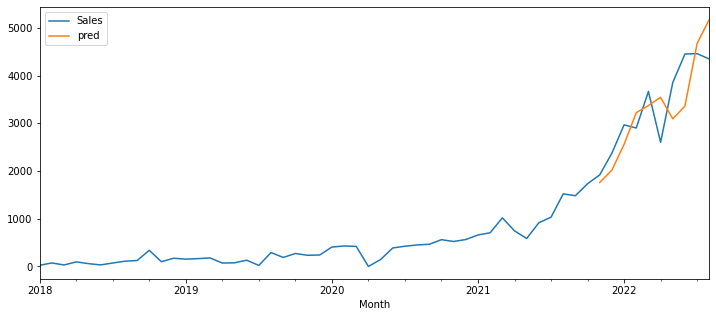

In [60]:
train['pred'] = model_predictions
train.plot()

In [62]:
MSE_error = mean_squared_error(train['Sales'][-10:], train['pred'][-10:])
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 390071.8916566737


In [74]:
train = combined[:-6]
train

,Sales,Petrol price
Month,,
2018-01-31,25,73.80
2018-02-28,73,75.49
2018-03-31,31,75.14
2018-04-30,95,76.79
2018-05-31,59,77.77
2018-06-30,32,79.24
2018-07-31,72,79.59
2018-08-31,110,80.19
2018-09-30,124,85.15


In [71]:
df = pd.read_csv('ev_test.csv')
df['Month'] = pd.date_range(start='15/7/2022', periods=4, freq='M')
df.set_index("Month",inplace=True)
df

,Sales,Petrol price
Month,,
2022-07-31,4458,102.63
2022-08-31,4346,102.63
2022-09-30,4240,102.63
2022-10-31,4935,102.63


In [73]:
test = test[:-2]
test = test.append(df[-2:])
test

,Sales,Petrol price
2022-03-31,3667,101.40
2022-04-30,2601,110.84
2022-05-31,3853,110.94
2022-06-30,4451,102.63
2022-07-31,4458,102.63
2022-08-31,4346,102.63
2022-09-30,4240,102.63
2022-10-31,4935,102.63


In [67]:
combined

,Sales,Petrol price
Month,,
2018-01-31,25,73.80
2018-02-28,73,75.49
2018-03-31,31,75.14
2018-04-30,95,76.79
2018-05-31,59,77.77
2018-06-30,32,79.24
2018-07-31,72,79.59
2018-08-31,110,80.19
2018-09-30,124,85.15


In [81]:
train = train[:-2]
train

,Sales,Petrol price
Month,,
2018-01-31,25.0,73.80
2018-02-28,73.0,75.49
2018-03-31,31.0,75.14
2018-04-30,95.0,76.79
2018-05-31,59.0,77.77
2018-06-30,32.0,79.24
2018-07-31,72.0,79.59
2018-08-31,110.0,80.19
2018-09-30,124.0,85.15


In [82]:
new_model_predictions=[]
for i in range(len(train)):
    new_model_predictions.append(np.nan)
for time_point in range(8):
    model = SARIMAX(train['Sales'],order=(1,2,4),seasonal_order=(1,1,[],12),enforce_invertibility=False)
    results = model.fit()
    output = results.forecast()
    new_model_predictions.append(output[0])
    train = train.append(test.iloc[time_point])
print(new_model_predictions)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3517.1525078223754, 3748.5083927421074, 3345.2074675330414, 3519.6253245031016, 4724.162201383388, 5141.420421906897, 4927.610333766441, 4793.441113302908]


<AxesSubplot:xlabel='Month'>

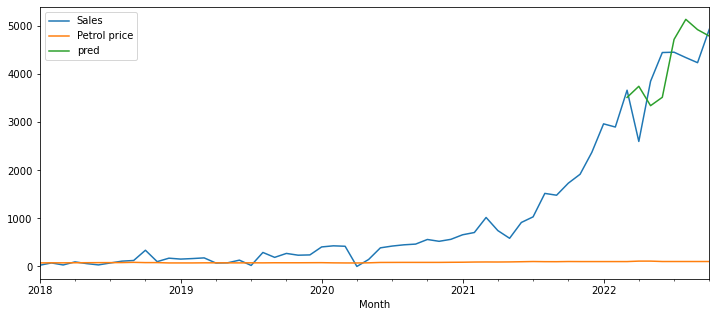

In [83]:
train['pred'] = new_model_predictions
train.plot()

In [84]:
train

,Sales,Petrol price,pred
Month,,,
2018-01-31,25.0,73.80,NaN
2018-02-28,73.0,75.49,NaN
2018-03-31,31.0,75.14,NaN
2018-04-30,95.0,76.79,NaN
2018-05-31,59.0,77.77,NaN
2018-06-30,32.0,79.24,NaN
2018-07-31,72.0,79.59,NaN
2018-08-31,110.0,80.19,NaN
2018-09-30,124.0,85.15,NaN


In [85]:
MSE_error = mean_squared_error(train['Sales'][-8:], train['pred'][-8:])
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 457615.5848810964


<AxesSubplot:xlabel='Month'>

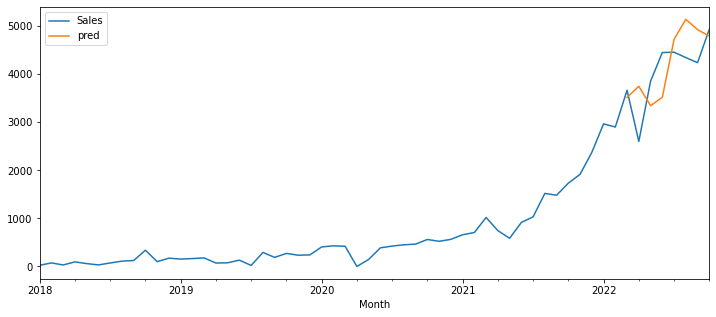

In [86]:
train.drop(['Petrol price'],axis=1,inplace=True)
train.plot()

In [88]:
train1

,Sales,pred
Month,,
2018-01-31,25.0,NaN
2018-02-28,73.0,NaN
2018-03-31,31.0,NaN
2018-04-30,95.0,NaN
2018-05-31,59.0,NaN
2018-06-30,32.0,NaN
2018-07-31,72.0,NaN
2018-08-31,110.0,NaN
2018-09-30,124.0,NaN


<AxesSubplot:xlabel='Month'>

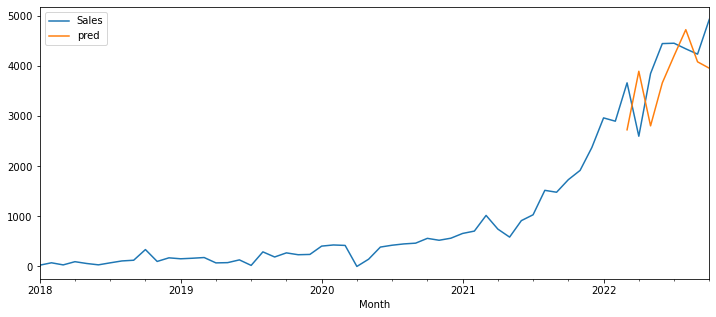

In [110]:
import random
from random import randint,choice
for i in range(1,9):
    train1['pred'][-i] = train1['Sales'][-i-1] + randint(*choice([(-300,-100),(100,300)]))
train1
train1.plot()

In [111]:
MSE_error = mean_squared_error(train1['Sales'][-8:], train1['pred'][-8:])
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 681997.25
